In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

In [106]:
df = pd.read_csv('Ind_Climate_RainPred.csv')
df.head()

,Temperature_min,Temperature_max,WindSpeedAt3am,WindSpeedAt10am,WindSpeedAt6pm,HumidityLevelAt10am,HumidityAt6pm,PressureAt10am,PressureAt6pm,TemperatureAt10am,TemperatureAt6pm,WillRainTomorrow?
0,20.3,30.7,32,6,17,110,72,1025.2,1015.4,26.6,40.4,No
1,30.0,33.3,33,10,20,70,35,1032.6,1035.4,26.6,39.3,No
2,23.5,26.9,24,14,20,98,63,1025.5,1026.0,29.8,34.6,Yes
3,25.5,26.9,45,20,30,82,59,1019.3,1016.9,24.2,30.8,No
4,33.5,39.3,33,4,12,94,49,1027.3,1022.2,33.6,43.6,No


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10464 entries, 0 to 10463
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Temperature_min      10464 non-null  float64
 1   Temperature_max      10464 non-null  float64
 2   WindSpeedAt3am       10464 non-null  int64  
 3   WindSpeedAt10am      10464 non-null  int64  
 4   WindSpeedAt6pm       10464 non-null  int64  
 5   HumidityLevelAt10am  10464 non-null  int64  
 6   HumidityAt6pm        10464 non-null  int64  
 7   PressureAt10am       10464 non-null  float64
 8   PressureAt6pm        10464 non-null  float64
 9   TemperatureAt10am    10464 non-null  float64
 10  TemperatureAt6pm     10464 non-null  float64
 11  WillRainTomorrow?    10464 non-null  object 
dtypes: float64(6), int64(5), object(1)
memory usage: 981.1+ KB


## 1. Exploratory Data Analysis

### 1. Check the datatype of all the variables in the dataset. If the datatype is not as per the definition, do the needful.

In [108]:
df.dtypes

Temperature_min        float64
Temperature_max        float64
WindSpeedAt3am           int64
WindSpeedAt10am          int64
WindSpeedAt6pm           int64
HumidityLevelAt10am      int64
HumidityAt6pm            int64
PressureAt10am         float64
PressureAt6pm          float64
TemperatureAt10am      float64
TemperatureAt6pm       float64
WillRainTomorrow?       object
dtype: object

### 2. Check the statistical summary of all the numerical variables.

In [109]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature_min,10464.0,26.308964,6.843041,7.2,21.3,26.2,31.5,47.3
Temperature_max,10464.0,30.309939,7.424327,13.2,24.6,29.5,35.6,55.8
WindSpeedAt3am,10464.0,41.391820,14.437279,9.0,31.0,39.0,49.0,131.0
WindSpeedAt10am,10464.0,15.379683,7.449217,2.0,10.0,14.0,20.0,58.0
WindSpeedAt6pm,10464.0,20.394209,7.847386,2.0,15.0,20.0,25.0,63.0
HumidityLevelAt10am,10464.0,82.210627,18.557838,11.0,70.0,85.0,98.0,110.0
HumidityAt6pm,10464.0,60.992928,22.737736,4.0,44.0,59.0,77.0,110.0
PressureAt10am,10464.0,1023.362481,7.536385,993.7,1018.4,1023.4,1028.6,1048.9
PressureAt6pm,10464.0,1020.702332,7.433202,991.9,1015.6,1020.7,1025.7,1046.4
TemperatureAt10am,10464.0,30.713083,6.752840,10.3,25.8,30.8,35.4,56.3


### 3. Is the target variable highly imbalanced?

In [110]:
df['WillRainTomorrow?'].value_counts()

WillRainTomorrow?
No     5464
Yes    5000
Name: count, dtype: int64

#### No target variable is not imbalanced

### 4. Check if any missing values are present in the data. If yes, do the needful.

In [111]:
df.isna().sum()

Temperature_min        0
Temperature_max        0
WindSpeedAt3am         0
WindSpeedAt10am        0
WindSpeedAt6pm         0
HumidityLevelAt10am    0
HumidityAt6pm          0
PressureAt10am         0
PressureAt6pm          0
TemperatureAt10am      0
TemperatureAt6pm       0
WillRainTomorrow?      0
dtype: int64

### 5. Visualize the distribution of all the independent variables and identify the type of skewness.

Skewness of Temperature_min = 0.01
Skewness of Temperature_max = 0.36
Skewness of WindSpeedAt3am = 0.97
Skewness of WindSpeedAt10am = 0.68
Skewness of WindSpeedAt6pm = 0.63
Skewness of HumidityLevelAt10am = -0.64
Skewness of HumidityAt6pm = 0.19
Skewness of PressureAt10am = -0.05
Skewness of PressureAt6pm = 0.0
Skewness of TemperatureAt10am = 0.08
Skewness of TemperatureAt6pm = 0.31


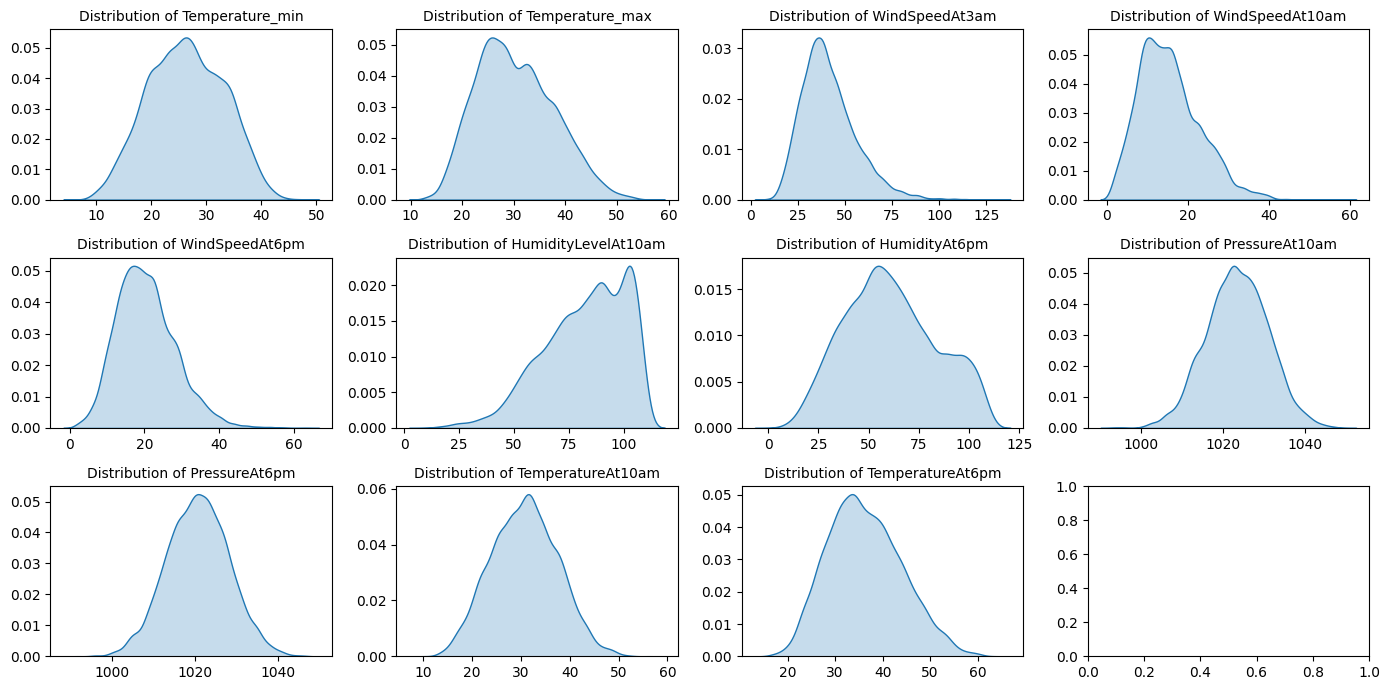

In [112]:
fig, axes = plt.subplots(3, 4, figsize=(14,7))
axes = axes.ravel()

for i,j in enumerate(df.columns[:-1]):
    sns.kdeplot(df[j], fill=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {j}", fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    print(f"Skewness of {j} = {round(df[j].skew(), 2)}")

plt.tight_layout()
plt.show()

### 6. Transform the independent variables such that each variable will have a mean zero and standard deviation of 1.

In [113]:
df1 = df[df.columns[:-1]].apply(zscore)
df1['WillRainTomorrow?'] = df['WillRainTomorrow?'].values
df = df1.copy()

In [114]:
df['WillRainTomorrow?'].replace({'Yes': 1, 'No': 0}, inplace=True)
df['WillRainTomorrow?'] = df['WillRainTomorrow?'].astype('int64')

In [115]:
df.head()

,Temperature_min,Temperature_max,WindSpeedAt3am,WindSpeedAt10am,WindSpeedAt6pm,HumidityLevelAt10am,HumidityAt6pm,PressureAt10am,PressureAt6pm,TemperatureAt10am,TemperatureAt6pm,WillRainTomorrow?
0,-0.878155,0.052541,-0.650557,-1.259210,-0.432548,1.497518,0.484111,0.243831,-0.713365,-0.609118,0.541413,0
1,0.539411,0.402758,-0.581288,-0.722216,-0.050237,-0.658008,-1.143217,1.225781,1.977394,-0.609118,0.398983,0
2,-0.410504,-0.459315,-1.204704,-0.185221,-0.050237,0.850860,0.088275,0.283640,0.712737,-0.135221,-0.209583,1
3,-0.118223,-0.459315,0.249933,0.620272,1.224134,-0.011350,-0.087653,-0.539075,-0.511558,-0.964541,-0.701615,0
4,1.050904,1.210950,-0.581288,-1.527708,-1.069733,0.635308,-0.527471,0.522493,0.201493,0.427532,0.955756,0


## 2. Principal Component Analysis (PCA)

### 7. Find the covariance matrix of the standardized data.

In [116]:
df_num = df[df.columns[:-1]]

https://numpy.org/doc/stable/reference/generated/numpy.cov.html

In [117]:
cov_matrix = np.cov(df_num.T)
cov_matrix

array([[ 1.00009557,  0.62986804,  0.2774717 ,  0.19188583,  0.10114221,
        -0.25035675, -0.05795163, -0.3635111 , -0.34036162,  0.71612149,
         0.54811355],
       [ 0.62986804,  1.00009557,  0.23626203, -0.01431146,  0.07161277,
        -0.50728072, -0.55772371, -0.24497184, -0.29854472,  0.76966307,
         0.8658169 ],
       [ 0.2774717 ,  0.23626203,  1.00009557,  0.42037333,  0.57176138,
        -0.27611053, -0.11724591, -0.47841125, -0.47563157,  0.27207988,
         0.17209019],
       [ 0.19188583, -0.01431146,  0.42037333,  1.00009557,  0.33458778,
        -0.31749763, -0.00663469, -0.25165481, -0.18433562,  0.14168084,
        -0.0391036 ],
       [ 0.10114221,  0.07161277,  0.57176138,  0.33458778,  1.00009557,
        -0.19684857, -0.15049059, -0.33940416, -0.30875067,  0.10542863,
         0.04909065],
       [-0.25035675, -0.50728072, -0.27611053, -0.31749763, -0.19684857,
         1.00009557,  0.66141695,  0.15161387,  0.15052404, -0.46424741,
        -0.465

### 8. Compute the eigenvalues and eigenvectors of the above covariance matrix.

In [118]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [119]:
eigenvalues

array([4.37827342, 2.20537611, 1.4028951 , 0.93909121, 0.69185977,
       0.38762838, 0.34242384, 0.24329175, 0.11262274, 0.13748201,
       0.160107  ])

In [120]:
eigen = [(eigenvalues[i], eigenvectors[i]) for i in range(len(eigenvalues))]

In [121]:
sorted(eigen, key=lambda x: x[0], reverse=True)

[(4.378273424761766,
  array([ 0.33781785,  0.03549082,  0.35858565, -0.42444298,  0.13644818,
          0.14320347, -0.03924682,  0.7102148 ,  0.1131725 , -0.11587593,
         -0.06766114])),
 (2.2053761142853308,
  array([ 0.40087506,  0.28485778,  0.10425574,  0.03376955,  0.1189962 ,
         -0.08118397,  0.15405941, -0.11028839, -0.82752819, -0.0604924 ,
          0.03216514])),
 (1.402895095728117,
  array([ 0.26666777, -0.38120744, -0.1908883 , -0.02705605,  0.31592881,
         -0.78707893, -0.12571969,  0.05588588,  0.05942134,  0.04255307,
         -0.05314346])),
 (0.939091208023474,
  array([ 0.14561644, -0.32320401, -0.33544556, -0.59156622, -0.38842204,
          0.06004674,  0.47855507, -0.14902074, -0.05799504, -0.04274979,
         -0.03114975])),
 (0.6918597738714429,
  array([ 0.17812567, -0.3671682 , -0.34917199,  0.09189247,  0.61597616,
          0.55598391, -0.01913024, -0.05338958, -0.03795733, -0.01323056,
          0.09857223])),
 (0.38762837994450383,
  arr

In [122]:
np.array([i[1] for i in sorted(eigen, key=lambda x: x[0], reverse=True)[:4]])

array([[ 0.33781785,  0.03549082,  0.35858565, -0.42444298,  0.13644818,
         0.14320347, -0.03924682,  0.7102148 ,  0.1131725 , -0.11587593,
        -0.06766114],
       [ 0.40087506,  0.28485778,  0.10425574,  0.03376955,  0.1189962 ,
        -0.08118397,  0.15405941, -0.11028839, -0.82752819, -0.0604924 ,
         0.03216514],
       [ 0.26666777, -0.38120744, -0.1908883 , -0.02705605,  0.31592881,
        -0.78707893, -0.12571969,  0.05588588,  0.05942134,  0.04255307,
        -0.05314346],
       [ 0.14561644, -0.32320401, -0.33544556, -0.59156622, -0.38842204,
         0.06004674,  0.47855507, -0.14902074, -0.05799504, -0.04274979,
        -0.03114975]])

### 9. Use the Kaiser criterion to identify the optimal number of principal components.

In [123]:
# The Kaiser criterion states that you should retain only the principal components with eigenvalues greater than 1.
np.sum(eigenvalues > 1)

3

### 10. How many minimum principal components are required to explain at least 80% of the variation in the data?

In [124]:
var = [i/np.sum(eigenvalues) for i in eigenvalues]

In [125]:
print(sorted(var, reverse=True))

[0.39798681925287016, 0.20046957780587485, 0.12752372972792683, 0.0853637693698708, 0.06289033234307155, 0.03523557599526814, 0.031126464812217664, 0.022115317719849797, 0.014553790610444298, 0.012497169749012828, 0.010237452613593375]


In [126]:
np.cumsum(sorted(var, reverse=True))

array([0.39798682, 0.5984564 , 0.72598013, 0.8113439 , 0.87423423,
       0.9094698 , 0.94059627, 0.96271159, 0.97726538, 0.98976255,
       1.        ])

### 4 PC's are required to explain atleast 80% variance in the data

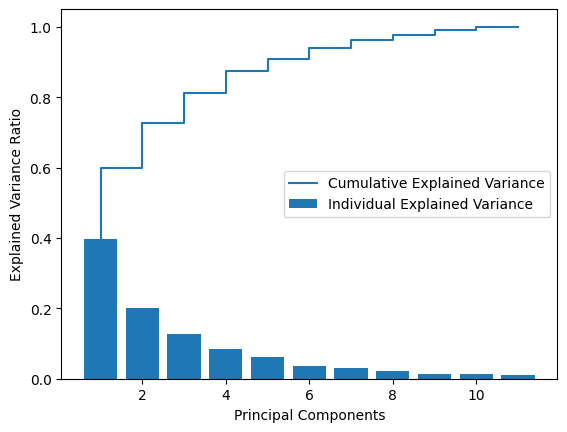

In [127]:
plt.bar(np.arange(1, 12), sorted(var, reverse=True), label='Individual Explained Variance')
plt.step(np.arange(1, 12), np.cumsum(sorted(var, reverse=True)), label='Cumulative Explained Variance' )

plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.show()

### 11. Create a dataframe of the transformed data with 4 principal components.

In [128]:
np.array([i[1] for i in sorted(eigen, key=lambda x: x[0], reverse=True)[:4]]).T

array([[ 0.33781785,  0.40087506,  0.26666777,  0.14561644],
       [ 0.03549082,  0.28485778, -0.38120744, -0.32320401],
       [ 0.35858565,  0.10425574, -0.1908883 , -0.33544556],
       [-0.42444298,  0.03376955, -0.02705605, -0.59156622],
       [ 0.13644818,  0.1189962 ,  0.31592881, -0.38842204],
       [ 0.14320347, -0.08118397, -0.78707893,  0.06004674],
       [-0.03924682,  0.15405941, -0.12571969,  0.47855507],
       [ 0.7102148 , -0.11028839,  0.05588588, -0.14902074],
       [ 0.1131725 , -0.82752819,  0.05942134, -0.05799504],
       [-0.11587593, -0.0604924 ,  0.04255307, -0.04274979],
       [-0.06766114,  0.03216514, -0.05314346, -0.03114975]])

In [129]:
a = pd.DataFrame(np.dot(df_num, np.array([i[1] for i in sorted(eigen, key=lambda x: x[0], reverse=True)[:4]]).T), 
             columns=[f"PC{i+1}" for i in range(4)])

a

,PC1,PC2,PC3,PC4
0,0.269209,0.071824,-1.555588,1.322094
1,1.376340,-1.604567,0.905449,-0.280222
2,-0.084867,-1.108361,-0.332475,0.643914
3,-0.342555,0.520419,0.421487,-0.664552
4,1.083369,0.174418,-0.792196,0.924012
...,...,...,...,...
10459,-0.481495,1.551754,1.081649,-1.952134
10460,0.717442,0.763488,-0.305215,-0.463782
10461,-0.138713,-0.937271,0.395923,0.651086
10462,-0.402485,0.605397,-0.969324,0.088680


### 12. Visualize the rain prediction data by transforming it to 2-dimensions using the python library. Also, display the classes of the target variables with different colors.

In [130]:
model = PCA(2)
model.fit(df_num)

PCA(n_components=2)

In [131]:
pd.DataFrame(model.transform(df_num), columns=['PC1', 'PC2'])

,PC1,PC2
0,-1.193577,-0.344281
1,-0.417268,-2.300435
2,-1.374390,-0.522208
3,-0.166105,1.620767
4,0.528825,-2.208708
...,...,...
10459,3.476093,0.250204
10460,1.856446,-0.477691
10461,-0.985504,-0.083237
10462,0.437889,0.305705


### 13. Split the dataset of the 11 standardized features into the train and test sets of proportion 70:30.

In [132]:
X = df_num
y = df[['WillRainTomorrow?']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 14. Reduce the number of features in the train and test sets to 3 using the python library.

In [133]:
model = PCA(3)
X_train_transformed = pd.DataFrame(model.fit_transform(X_train), columns=['PC1', 'PC2', 'PC3'])
X_test_transformed = pd.DataFrame(model.fit_transform(X_test), columns=['PC1', 'PC2', 'PC3'])

### 15. Write a generalized function that builds the random forest classification algorithm and returns the accuracy of the algorithm on the test set.

In [134]:
def randomforest_accuracy(X_train, X_test, y_train, y_test):
    model_rf = RandomForestClassifier()
    model_rf.fit(X_train, y_train)

    return model_rf.score(X_test, y_test)

### 16. Build a random forest model on the original data (without PCA transformation) and find the accuracy of the model on the test data. Also, calculate the time required to execute the code.

In [135]:
start_time = time.perf_counter()

print('Accuracy without PCA =',randomforest_accuracy(X_train, X_test, y_train, y_test))

end_time = time.perf_counter()
execution_time = end_time - start_time
print("Execution time:", execution_time)

Accuracy without PCA = 0.9493630573248407
Execution time: 2.5436056000180542


### 17. Build a random forest model on the dataset transformed using PCA and find the accuracy of the model on the test data. Also, calculate the time required to execute the code.

In [136]:
start_time = time.perf_counter()

print('Accuracy with PCA =',randomforest_accuracy(X_train_transformed, X_test_transformed, y_train, y_test))

end_time = time.perf_counter()
execution_time = end_time - start_time
print("Execution time:", execution_time)

Accuracy with PCA = 0.5624203821656051
Execution time: 1.9517343998886645
